# Narendra Modi Speech Analysis

## Libraries Import

In [ ]:
# Dataset operation
import numpy as np
import pandas as pd


# EDA
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

# Plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Install these libraries
'''
- nltk.download('vader_lexicon')
- !pip install vaderSentiment
- nltk.download('stopwords')
- nltk.download('punkt')

'''

In [8]:
data = pd.read_csv('/kaggle/input/modi-speeches/modi_speeches.csv')

In [9]:
data.head()

,id,url,title,article_text,images,publish_info,tags
0,0,https://www.narendramodi.in/remarks-by-prime-m...,"Remarks by Prime Minister, Shri Narendra Modi ...","\nYour Highness, My Brother,\nA warm welcome ...",https://cdn.narendramodi.in/cmsuploads/0.84114...,"Published By : Admin | February 18, 2022 | 20:...","UAE,India-UAE Summit,Virtual Summit,India Firs..."
1,1,https://www.narendramodi.in/text-of-pm-s-addre...,Text of PM's address at inauguration of newly ...,Namaskar!\nMaharashtra Governor Shri Bhagat Si...,https://cdn.narendramodi.in/cmsuploads/0.92565...,"Published By : Admin | February 18, 2022 | 16:...","Maharashtra,Mumbai,Chhatrapati Shivaji Maharaj..."
2,2,https://www.narendramodi.in/pm-s-inaugural-add...,Environmental sustainability can only be achie...,I am delighted to join you at the Twenty First...,NaN,"Published By : Admin | February 16, 2022 | 18:...","India First,The Energy and Resource Institute,..."
3,3,https://www.narendramodi.in/text-of-prime-mini...,Azadi Ka Amrit Mahotsav is the perfect time to...,"Hon’ble Mr. Speaker,\nI am here to reply on Mo...",NaN,"Published By : Admin | February 7, 2022 | 17:3...","Lok Sabha,President,Lata Mangeshkar,Noval Coro..."
4,4,https://www.narendramodi.in/prime-minister-nar...,Remarks by Prime Minister Shri Narendra Modi a...,I congratulate President Macron on this import...,NaN,"Published By : Admin | February 11, 2022 | 19:...","One Ocean Summit,India First,Good Governance,C..."


## Data Cleaning

In [10]:
# Dropping of images AND publish_info Columns
data.drop(columns = ['images','url'],inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            988 non-null    int64 
 1   title         988 non-null    object
 2   article_text  988 non-null    object
 3   publish_info  988 non-null    object
 4   tags          988 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.7+ KB


In [11]:
# Setting up id as default index
data.set_index('id',inplace = True)

## EXPLORATORY DATA ANALYSIS

### Most common tags 

In [12]:
# Collecting Tags and their counts
tags = {}

def filter_tags(tag_str):
    tag_str = tag_str.split(',')
    for tag in tag_str:
        if(tag not in tags):
            tags[tag] = 0
        tags[tag] += 1
    return tags

data['tags'].apply(filter_tags)

tags = dict(sorted(tags.items(), key=lambda item: item[1], reverse=True))

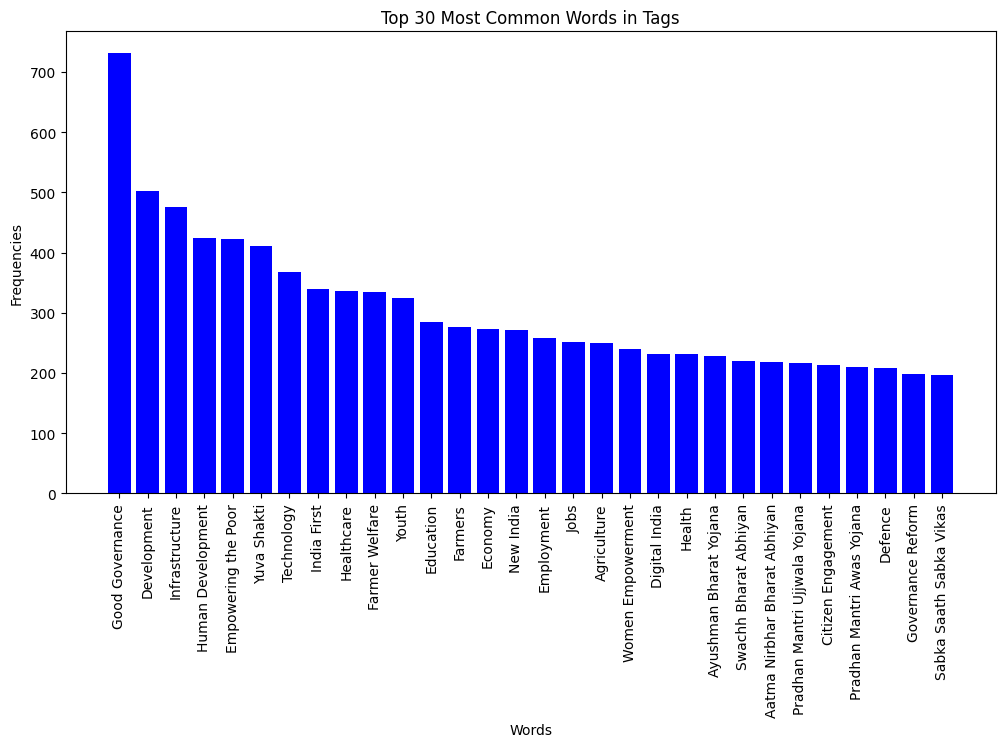

In [31]:
# 30 most popular tags
words, frequencies = zip(*list(tags.items())[1:31])

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 30 Most Common Words in Tags')
plt.xticks(rotation=90)
plt.show()

### Word Cloud of Popular Tags

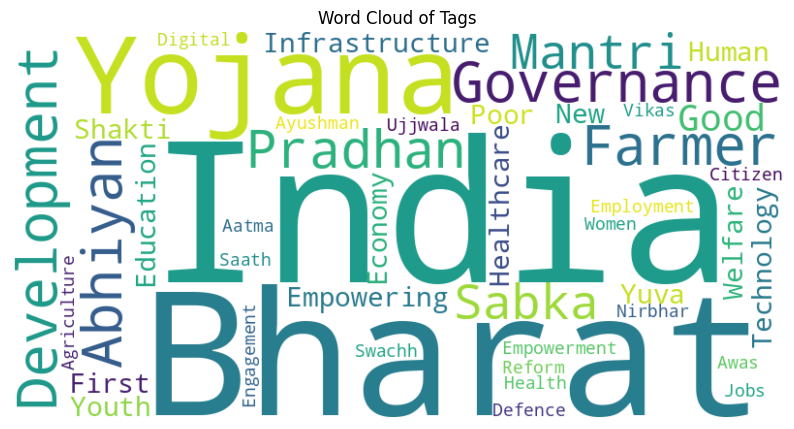

In [32]:
tags_text = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()

### Counting Words frequency for speech

In [14]:
# cleaning text in article_text column
def modifying(text):
    text = ' '.join(re.findall(r'\b[A-Za-z]+\b', text))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and split into tokens
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


cleaned_text = data['article_text'].apply(modifying)

In [28]:
all_text = ' '.join(cleaned_text)

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count word frequencies
word_freq = Counter(tokens)

most_common_words = word_freq.most_common(30)

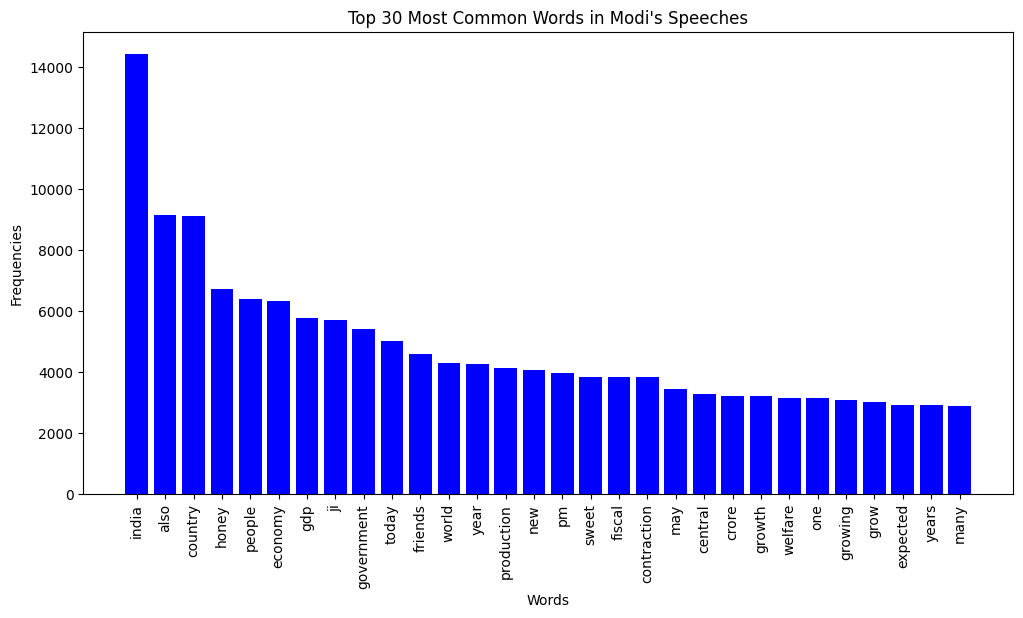

In [30]:
# Separate words and their frequencies
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 30 Most Common Words in Modi\'s Speeches')
plt.xticks(rotation=90)
plt.show()

### Speech Count 

In [17]:
# Converting publish_info to date_info
date_info = pd.to_datetime(data['publish_info'].apply(lambda x: x.split('|')[1].strip()))
data['year'] = date_info.dt.year
data['month'] = date_info.dt.month

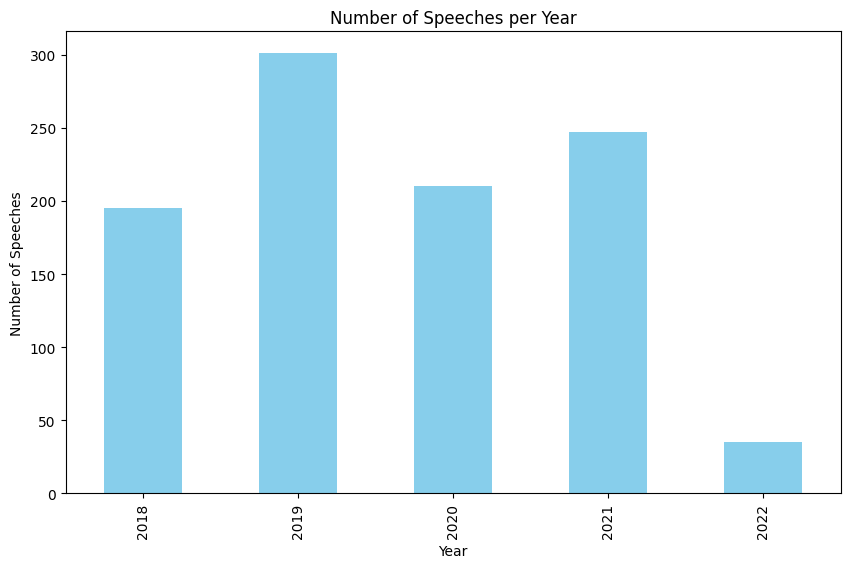

In [18]:
# Frequency of speeches per year
speeches_per_year = data['year'].value_counts().sort_index()

# Plot speeches per year
plt.figure(figsize=(10, 6))
speeches_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.title('Number of Speeches per Year')
plt.show()

<Figure size 2000x600 with 0 Axes>

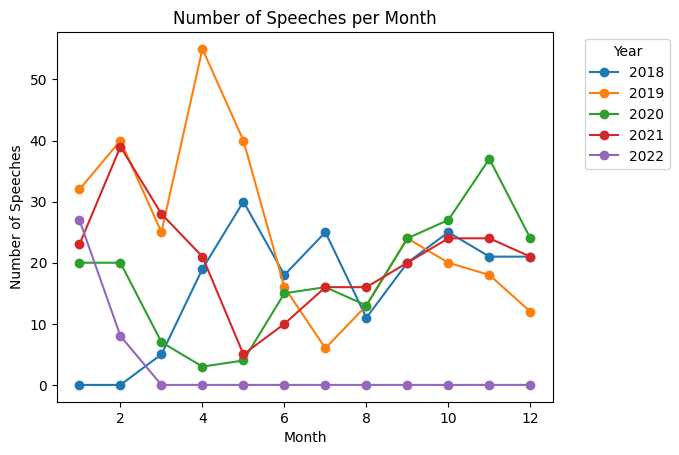

In [19]:
# Frequency of speeches per month (across all years)
speeches_per_month = data.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plot speeches per month
plt.figure(figsize=(20, 6))
speeches_per_month.T.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Speeches')
plt.title('Number of Speeches per Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Lets See the Sentiments of Narendra Modi Speeches

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
# getting sentiment scores
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']


data['sentiment_score'] = data['article_text'].apply(get_sentiment)

In [22]:
# Determine sentiment category based on compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['sentiment_score'].apply(categorize_sentiment)

In [23]:
# Analysing the number of positive vs negative speeches
data['sentiment'].value_counts()

sentiment
positive    988
Name: count, dtype: int64

**SUMMARY: Narendra Modi every speech contains Positive Sentimental Score**